# Soccer Database Analysis

This project aims to explore and analyze a soccer database using various data analysis techniques and visualizations. The database contains information about players, teams, matches, leagues, and more. We will load the data into pandas DataFrames and perform a series of analyses to gain insights into player attributes, team performance, match outcomes, and other aspects of soccer.

## Table of Contents

1. [Load Data and Inspect](#load-data-and-inspect)
2. [Descriptive Statistics and Distribution Plots](#descriptive-statistics-and-distribution-plots)
3. [Match Outcome Analysis](#match-outcome-analysis)

## Load Data and Inspect

First, we load each table from the SQLite database into pandas DataFrames. This step is crucial for accessing and manipulating the data easily.

By inspecting the first few rows of each DataFrame, we get an overview of the data available in each table, which helps us plan our subsequent analyses.

## Descriptive Statistics and Distribution Plots

Next, we calculate summary statistics for key attributes in the player and team attributes tables. Summary statistics include metrics like mean, median, and standard deviation, which provide a quick overview of the data distribution.

We also generate distribution plots for key attributes to visualize the distribution and frequency of specific values in the dataset. For example, we create histograms to show the distribution of overall player ratings and team build-up play speed.

## Match Outcome Analysis

Finally, we analyze match outcomes by examining the summary statistics for the number of goals scored by home and away teams. We calculate the average number of goals scored per match by both home and away teams and visualize the distribution of total goals per match by creating a histogram. This helps us understand the frequency of different match outcomes, such as high-scoring versus low-scoring games.

By performing these analyses, we gain valuable insights into the soccer data, which can guide further analysis and decision-making.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soccer/database.sqlite


In [2]:
#Improts 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


conn = sqlite3.connect("/kaggle/input/soccer/database.sqlite")

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


# Soccer Database Exploration

## Load Each Table into a Pandas DataFrame

First, we load each table from the SQLite database into a pandas DataFrame.


In [3]:
# Load each table into a pandas DataFrame
player_attributes = pd.read_sql("SELECT * FROM Player_Attributes", conn)
player = pd.read_sql("SELECT * FROM Player", conn)
match = pd.read_sql("SELECT * FROM Match", conn)
league = pd.read_sql("SELECT * FROM League", conn)
country = pd.read_sql("SELECT * FROM Country", conn)
team = pd.read_sql("SELECT * FROM Team", conn)
team_attributes = pd.read_sql("SELECT * FROM Team_Attributes", conn)

# Inspect the first few rows of each DataFrame
print(player_attributes.head())
print(player.head())
print(match.head())
print(league.head())
print(country.head())
print(team.head())
print(team_attributes.head())


   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties 

# Descriptive Statistics and Distribution Plots

## Summary Statistics

We start by calculating summary statistics for key attributes in the `player_attributes` and `team_attributes` DataFrames. Summary statistics include metrics like mean, median, standard deviation, etc., which provide a quick overview of the data distribution.


                 id  player_fifa_api_id  player_api_id  overall_rating  \
count  183978.00000       183978.000000  183978.000000   183142.000000   
mean    91989.50000       165671.524291  135900.617324       68.600015   
std     53110.01825        53851.094769  136927.840510        7.041139   
min         1.00000            2.000000    2625.000000       33.000000   
25%     45995.25000       155798.000000   34763.000000       64.000000   
50%     91989.50000       183488.000000   77741.000000       69.000000   
75%    137983.75000       199848.000000  191080.000000       73.000000   
max    183978.00000       234141.000000  750584.000000       94.000000   

           potential       crossing      finishing  heading_accuracy  \
count  183142.000000  183142.000000  183142.000000     183142.000000   
mean       73.460353      55.086883      49.921078         57.266023   
std         6.592271      17.242135      19.038705         16.488905   
min        39.000000       1.000000       1.0

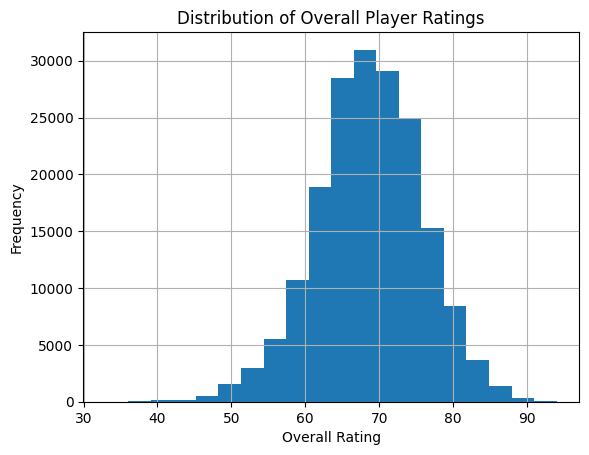

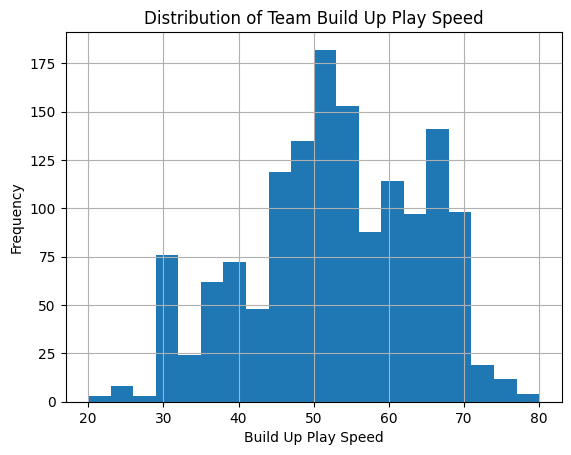

In [4]:
# Summary statistics
print(player_attributes.describe())
print(team_attributes.describe())

# Distribution plots
player_attributes['overall_rating'].hist(bins=20)
plt.title('Distribution of Overall Player Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

team_attributes['buildUpPlaySpeed'].hist(bins=20)
plt.title('Distribution of Team Build Up Play Speed')
plt.xlabel('Build Up Play Speed')
plt.ylabel('Frequency')
plt.show()


# Match Outcome Analysis

## Basic Match Outcome Analysis

First, we perform a basic analysis of match outcomes by examining the summary statistics for the number of goals scored by home and away teams.


       home_team_goal  away_team_goal
count    25979.000000    25979.000000
mean         1.544594        1.160938
std          1.297158        1.142110
min          0.000000        0.000000
25%          1.000000        0.000000
50%          1.000000        1.000000
75%          2.000000        2.000000
max         10.000000        9.000000
Average goals per match: 2.7055313907386735


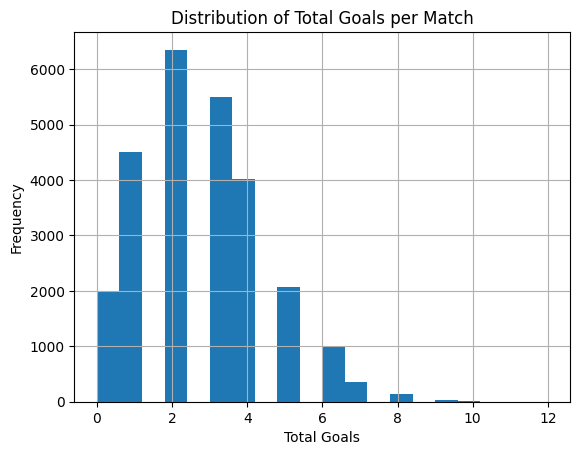

In [5]:
# Basic match outcome analysis
print(match[['home_team_goal', 'away_team_goal']].describe())

# Average goals per match
average_goals = match[['home_team_goal', 'away_team_goal']].mean().sum()
print(f'Average goals per match: {average_goals}')

# Distribution of match outcomes
match['total_goals'] = match['home_team_goal'] + match['away_team_goal']
match['total_goals'].hist(bins=20)
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()
